먼저 GPU를 선택하기 위해서, 수정 -> 노트 설정 -> 하드웨어 가속기를 GPU로 선택한다.

In [ ]:
!nvidia-smi

Fri Nov  1 11:01:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

관리를 위해서 HOME에 yolov9 설정

In [ ]:
import os, glob
from IPython.display import Image
from google.colab import drive, userdata


HOME = os.getcwd()
YOLO = os.path.join(HOME, 'yolov9')
print(HOME)
print(YOLO)

/content
/content/yolov9


In [ ]:
# 구글 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


YOLOv9 github Clone

In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


경량화 모델 weight 다운로드

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!ls -la {HOME}/weights

total 251528
drwxr-xr-x 2 root root     4096 Nov  1 11:02 .
drwxr-xr-x 1 root root     4096 Nov  1 04:15 ..
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt.1
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt.2
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt.3
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt.4


샘플 이미지 확인

In [ ]:
!ls -la {HOME}/yolov9/data/images

c 모델로 추론 해보기

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/yolov9/data/images/horses.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/yolov9/data/images/horses.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release

In [ ]:
!ls -la {HOME}/yolov9/runs/detect

total 64
drwxr-xr-x 16 root root 4096 Nov  1 11:02 .
drwxr-xr-x  4 root root 4096 Nov  1 04:17 ..
drwxr-xr-x  2 root root 4096 Nov  1 04:16 exp
drwxr-xr-x  2 root root 4096 Nov  1 09:51 exp10
drwxr-xr-x  2 root root 4096 Nov  1 11:02 exp11
drwxr-xr-x  2 root root 4096 Nov  1 04:35 exp2
drwxr-xr-x  2 root root 4096 Nov  1 04:41 exp3
drwxr-xr-x  2 root root 4096 Nov  1 05:14 exp4
drwxr-xr-x  2 root root 4096 Nov  1 07:31 exp5
drwxr-xr-x  2 root root 4096 Nov  1 07:52 exp6
drwxr-xr-x  2 root root 4096 Nov  1 09:43 exp62
drwxr-xr-x  2 root root 4096 Nov  1 09:47 exp63
drwxr-xr-x  2 root root 4096 Nov  1 09:48 exp64
drwxr-xr-x  2 root root 4096 Nov  1 09:44 exp7
drwxr-xr-x  2 root root 4096 Nov  1 09:50 exp8
drwxr-xr-x  2 root root 4096 Nov  1 09:50 exp9


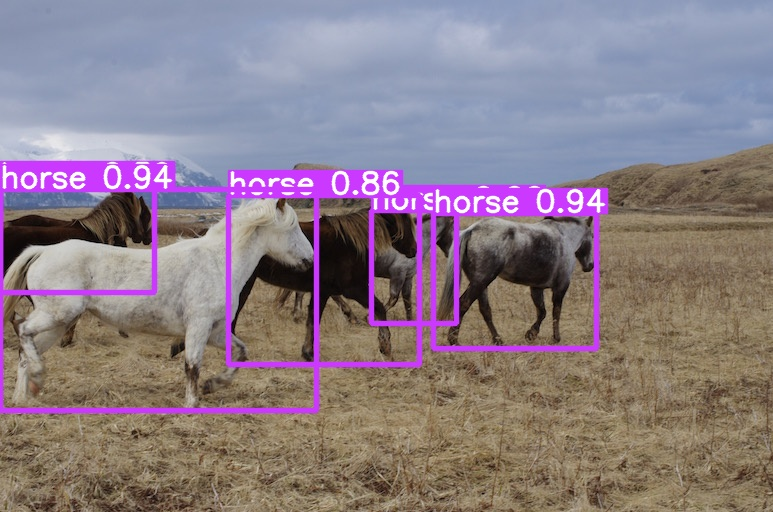

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/horses.jpg", width=600)

커스텀 COCO 데이터셋 학습

In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/data/coco.yaml'))


True


In [ ]:
#!rm /content/drive/MyDrive/data/coco/train.cache

In [ ]:
!python /content/yolov9/train.py --weights /content/drive/MyDrive/weights/gelan-c.pt --data /content/drive/MyDrive/data/coco.yaml


2024-11-01 11:02:17.615737: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 11:02:17.633632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 11:02:17.654858: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 11:02:17.661268: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 11:02:17.676929: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
#python /content/yolov9/train.py --weights /content/drive/MyDrive/weights/gelan-c.pt --cfg /content/yolov9/models/detect/gelan-c.yaml --data /content/drive/MyDrive/data/coco.yaml --epochs 50 --batch-size 16


In [ ]:
train_path = '/content/drive/MyDrive/data/coco/train.txt'

if os.path.exists(train_path):
    print("train.txt 파일이 Colab에서 정상적으로 접근 가능합니다.")
else:
    print("train.txt 파일을 Colab에서 인식하지 못합니다.")


train.txt 파일이 Colab에서 정상적으로 접근 가능합니다.


In [ ]:
pip install --upgrade Pillow

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 105 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/data/coco.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-11-01 11:03:00.003051: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 11:03:00.020600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 11:03:00.042109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 11:03:00.048452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 11:03:00.063544: I tensorflow/core/platform/

### 학습 결과

디폴트로 {HOME}/yolov9/runs/train/에 exp, exp2, exp3, ... 순서로 1씩 증가된 값으로 저장된다. 마지막 exp?가 최근 학습한 모델이다. --name 파라미터를 사용해서 덮어쓸 수 도 있다.

In [ ]:
!ls {HOME}/yolov9/runs/train

exp  exp10  exp11  exp12  exp13  exp2  exp3  exp4  exp5  exp6  exp64  exp65  exp7  exp8  exp9


In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1730434624.45b0bee2fae8.7006.0  hyp.yaml  opt.yaml	weights


In [ ]:
import glob

# 파일 경로를 검색합니다.
results_path = glob.glob('/content/yolov9/runs/train/**/results.png', recursive=True)
print("Results file path:", results_path)


Results file path: ['/content/yolov9/runs/train/exp11/results.png', '/content/yolov9/runs/train/exp12/results.png', '/content/yolov9/runs/train/exp13/results.png']


In [ ]:
#사물인식 가중치 민감도 조정하는것(conf)
!python detect.py --img 1280 --conf 0.05 --device 0 \
--weights /content/yolov9/runs/train/exp13/weights/best.pt \
--source /content/drive/MyDrive/data/coco/images/test/ \
--iou-thres 0.45 --max-det 1000 --project runs/detect --name ep6x

detect: weights=['/content/yolov9/runs/train/exp13/weights/best.pt'], source=/content/drive/MyDrive/data/coco/images/test/, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp6, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mo

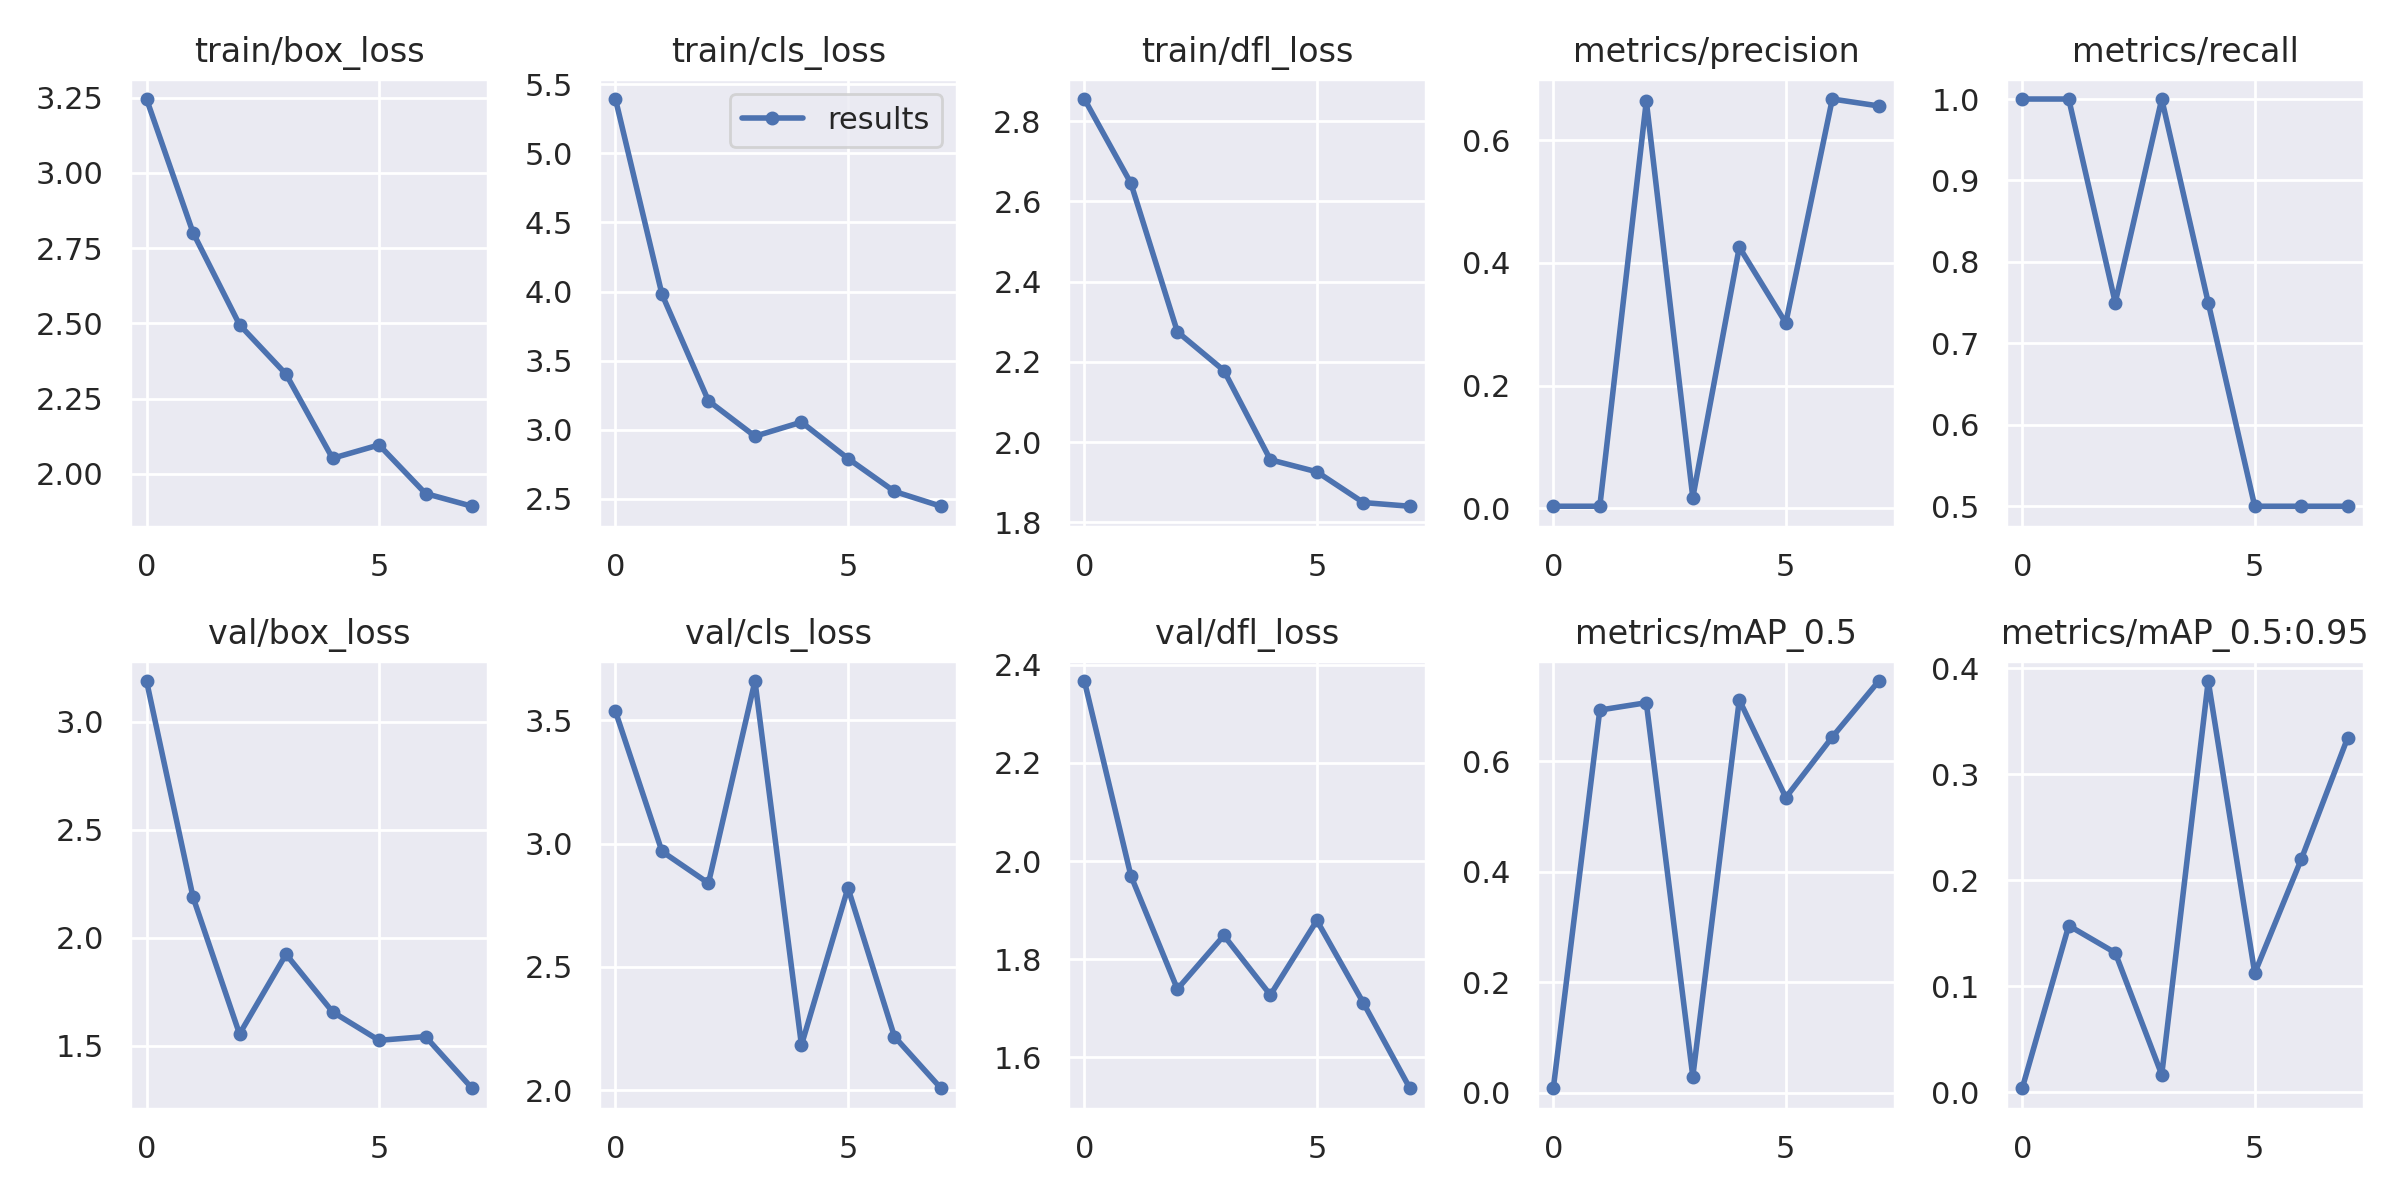

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/train/exp13/results.png", width=1000) #yolov9 1번 또는 2번 쳐서 찾아야됨!!

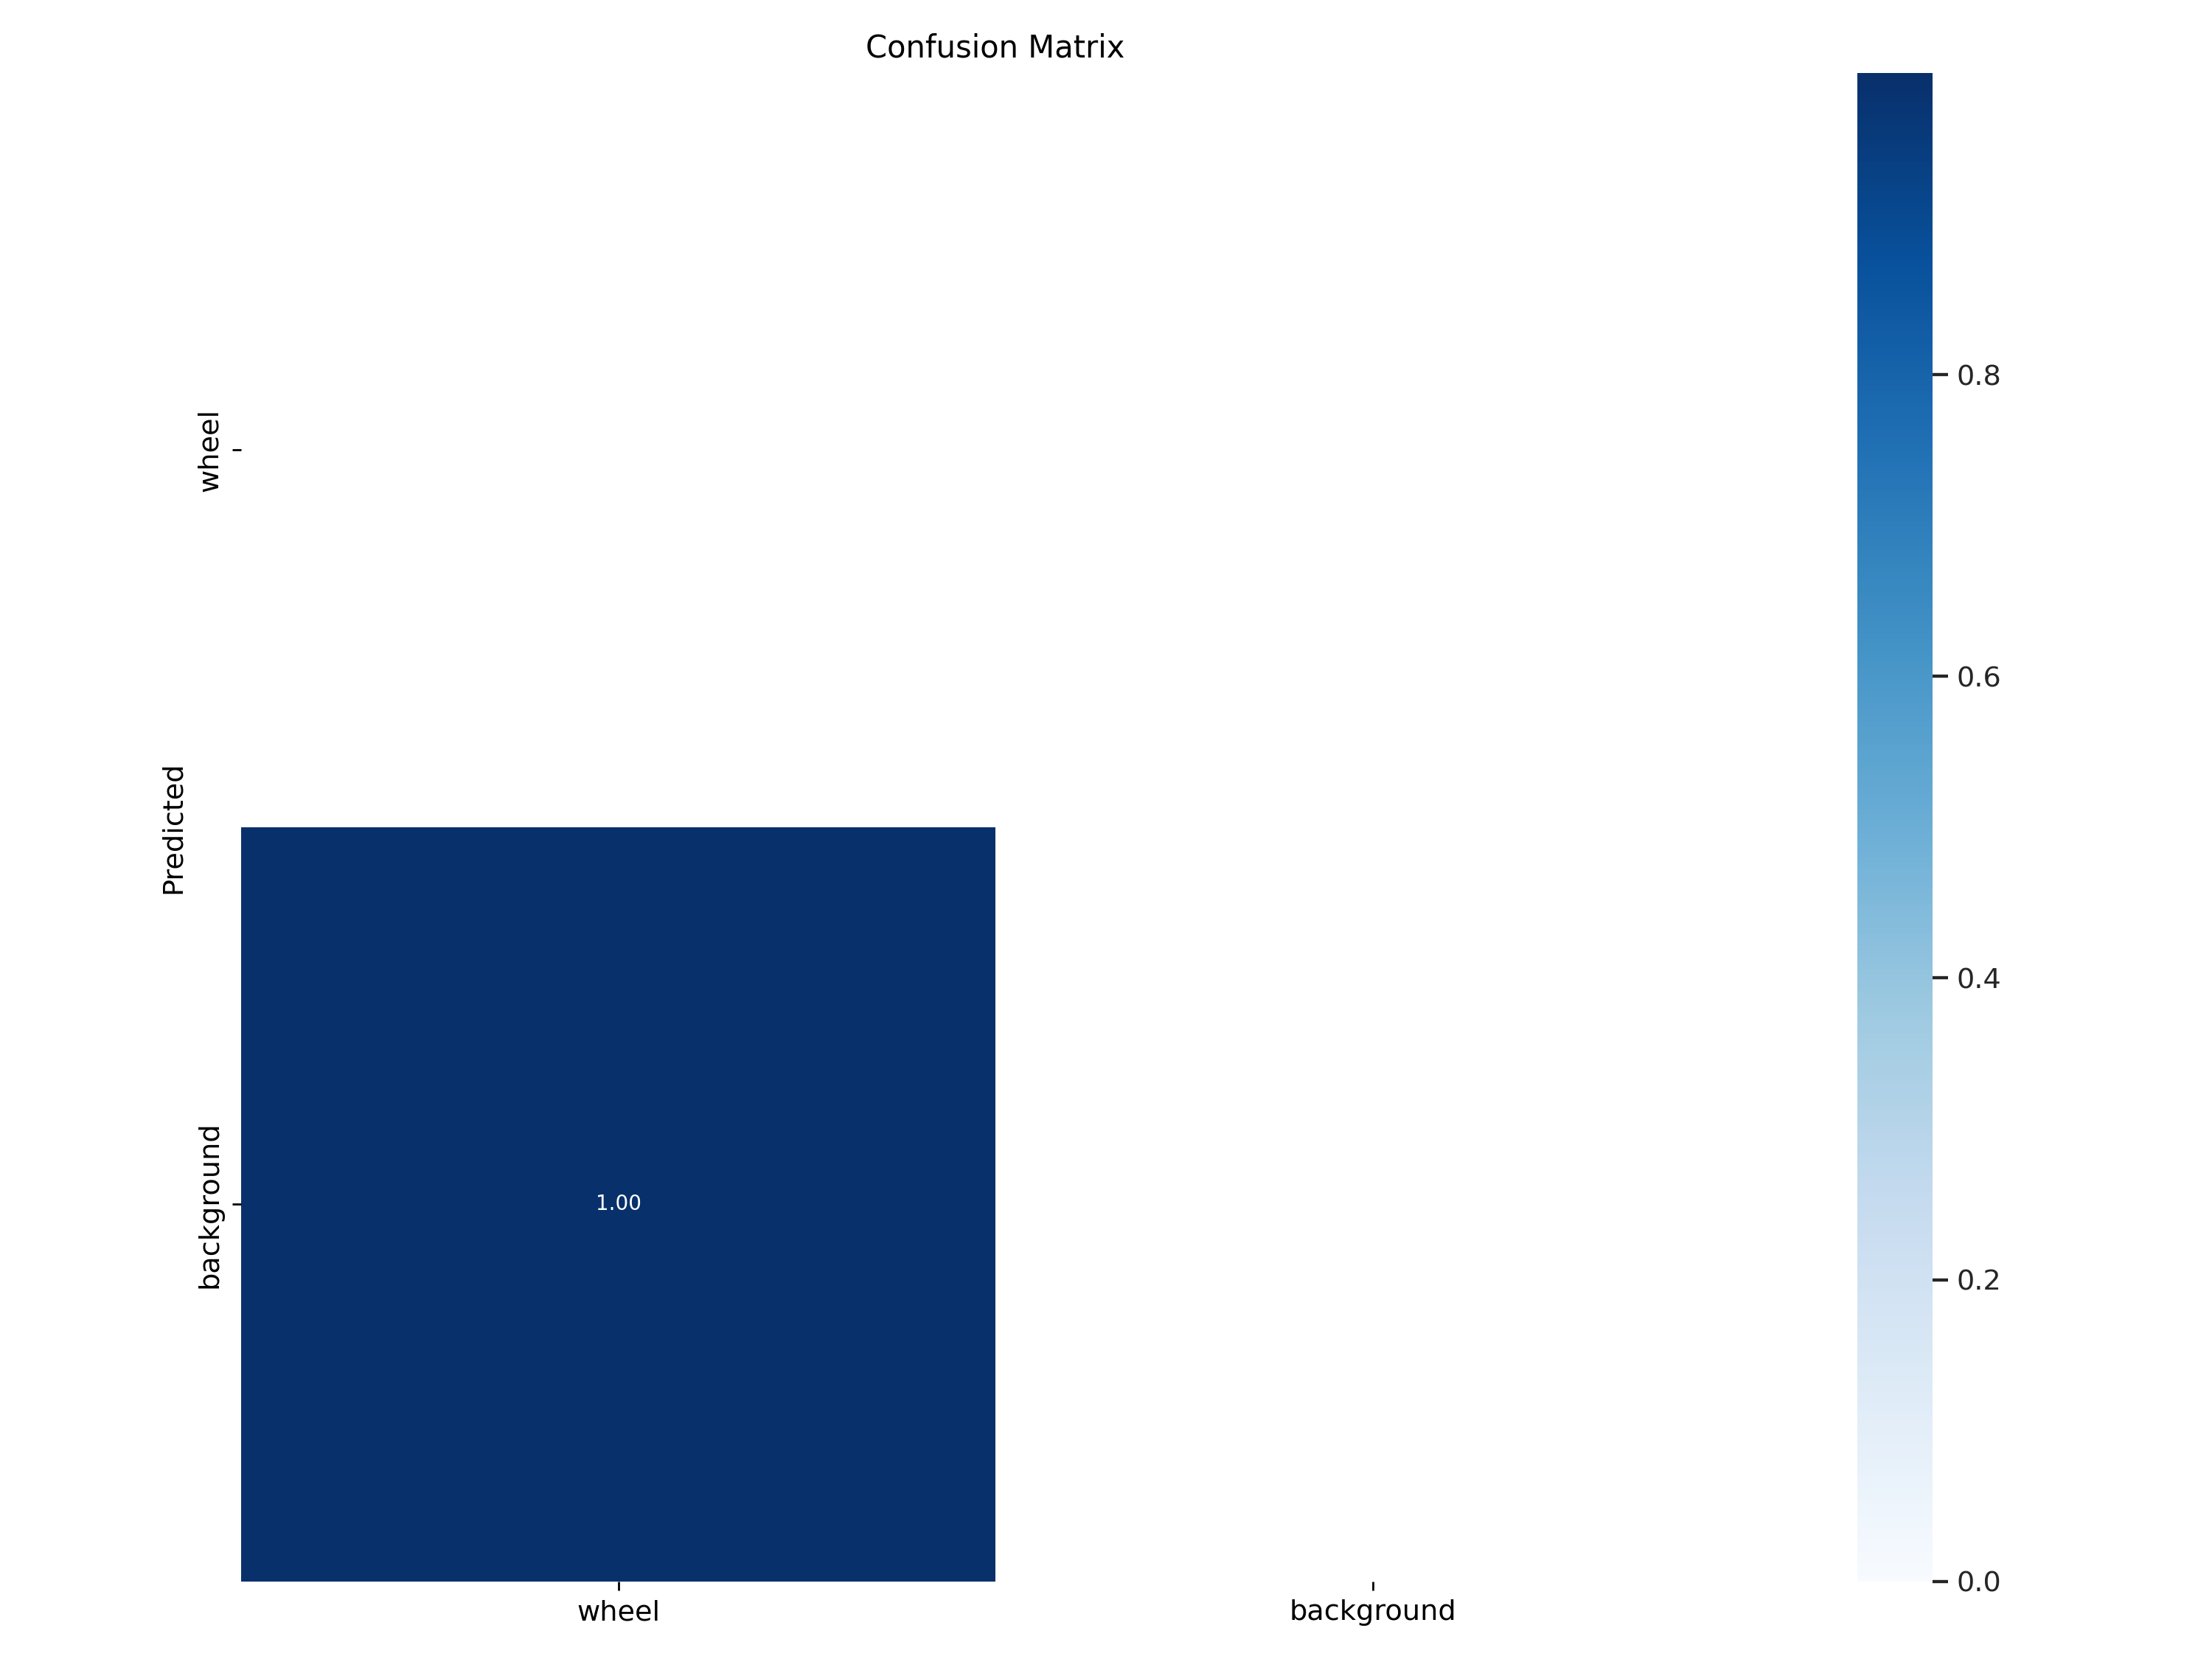

In [ ]:
from IPython.display import Image

Image(filename="/content/yolov9/runs/train/exp12/confusion_matrix.png", width=1000)

### 모델 복사

In [ ]:
!mkdir /content/drive/MyDrive/data/bin


mkdir: cannot create directory ‘/content/drive/MyDrive/data/bin’: File exists


In [ ]:
!cp  /content/yolov9/runs/train/exp13/weights/best.pt /content/drive/MyDrive/data/bin/ #11월1일, 파일경로 수정함! 욜로9 2번으로

### 모델 테스트

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/exp12/weights/best.pt/ \
--source /content/drive/MyDrive/data/coco/images/test/

detect: weights=['/content/yolov9/runs/train/exp12/weights/best.pt/'], source=/content/drive/MyDrive/data/coco/images/test/, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for mor

In [ ]:
!ls {HOME}/yolov9/runs/detect

exp    exp11  exp2  exp4  exp6	 exp63	exp65  exp7  exp9
exp10  exp12  exp3  exp5  exp62  exp64	exp66  exp8


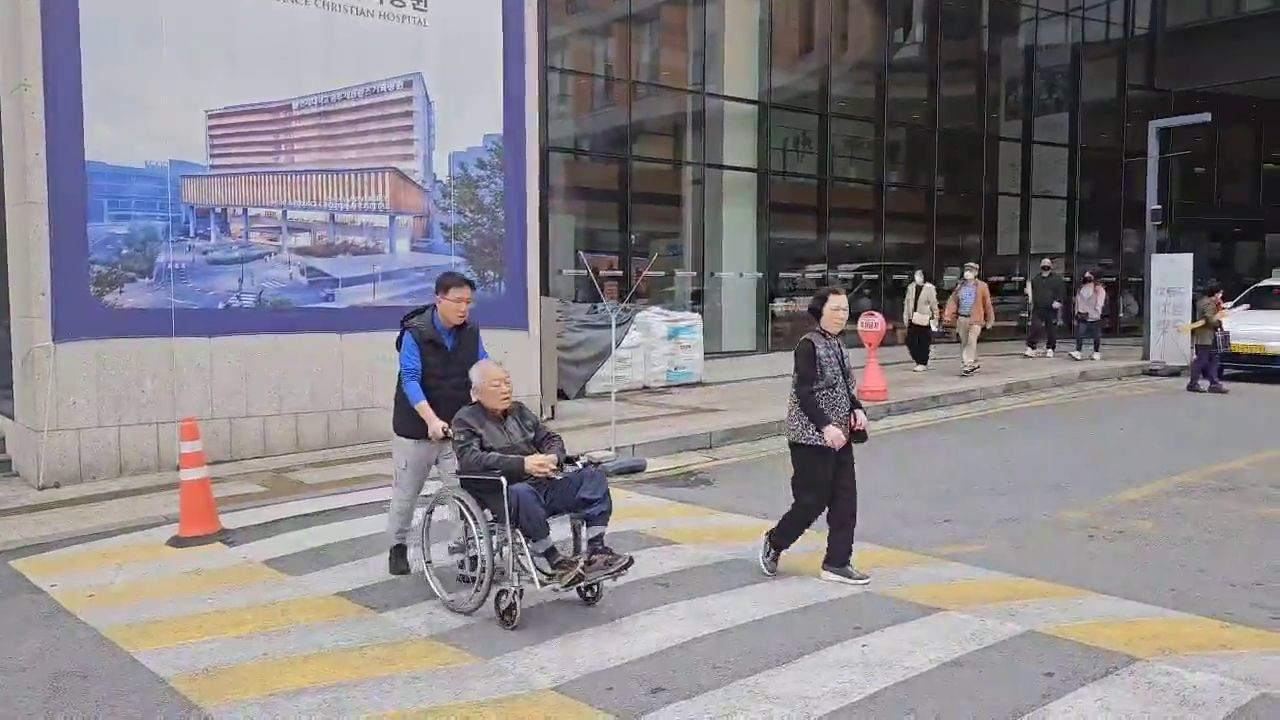

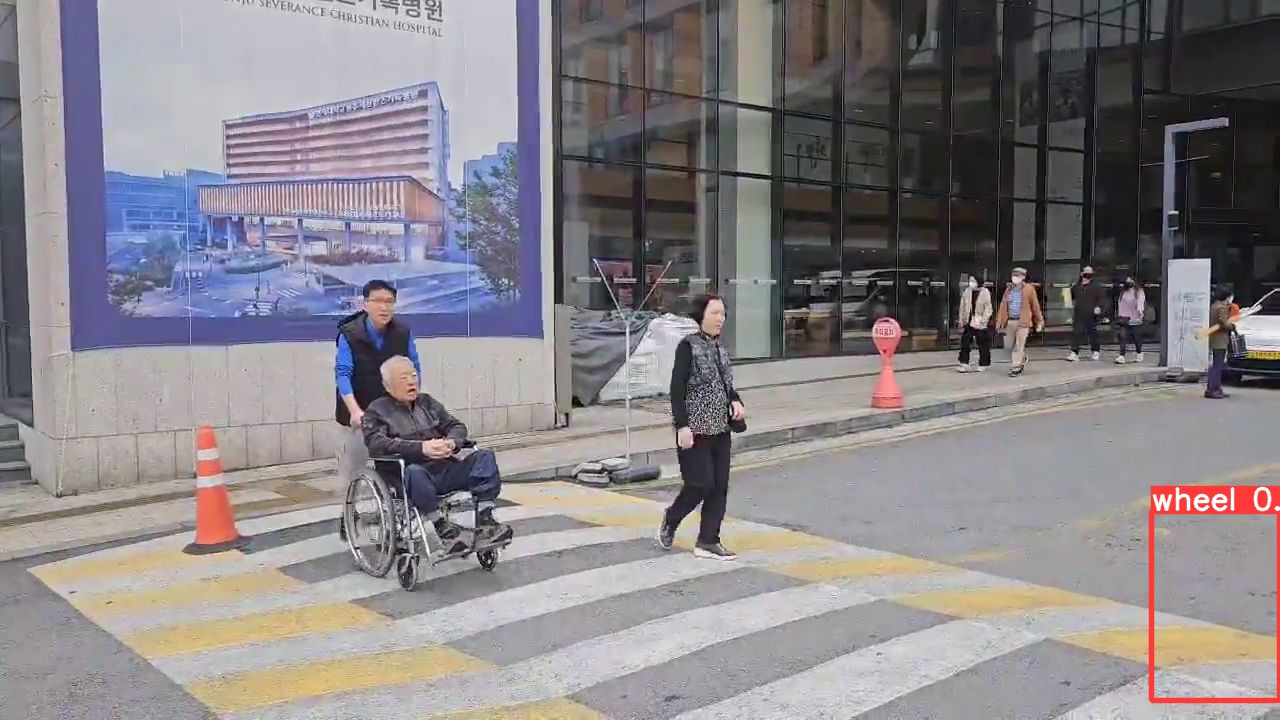

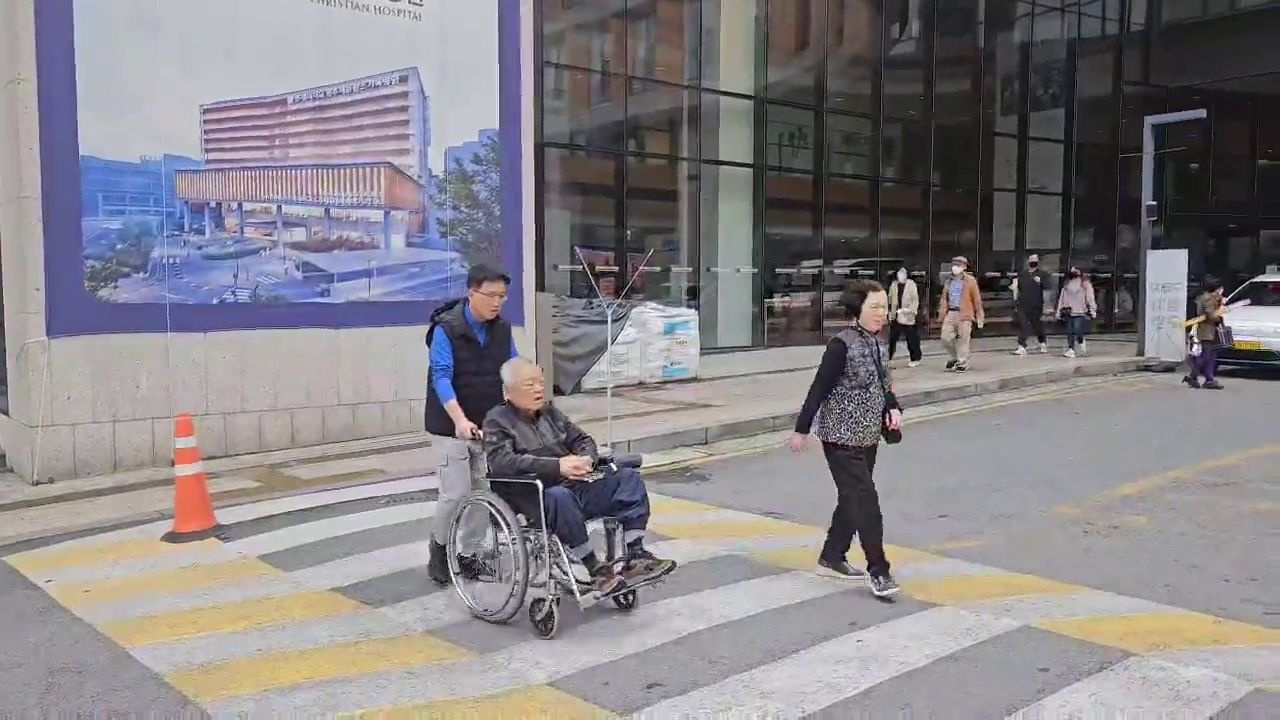

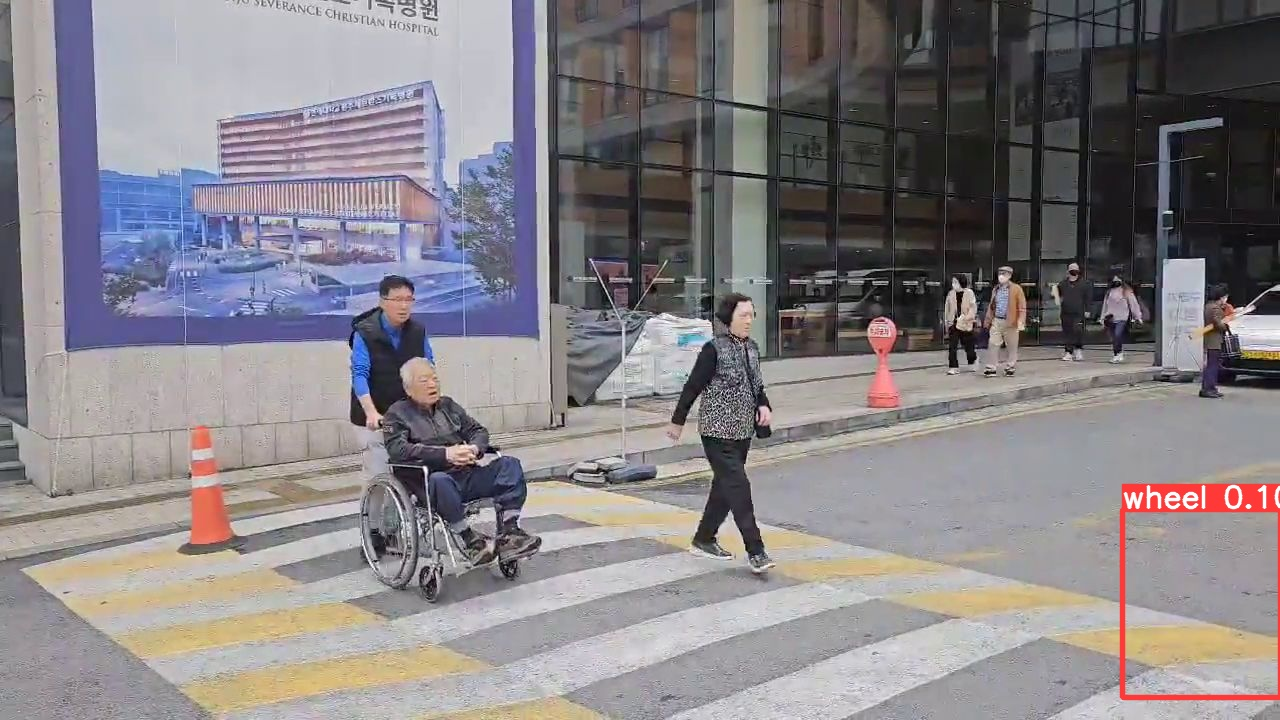

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp14/*.jpg')[:4]: #사진 몇개 출력할껀지 숫자로 정하는것
      display(Image(filename=image_path, width=600))